In [147]:
from textblob import TextBlob
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import pandas as pd
import random as rand
import numpy as np
import gensim
import seaborn as sns
import datetime

In [211]:
def checkSentiment(text):
    if text.sentiment[0] > 0.5:
        print("Wow that's great! I'm so glad you're doing so well :D \n")
        
    if text.sentiment[0] < 0.3:
        print("I'm sorry you are having such a bad day. Why don't you tell me three things you are grateful for today?\n")
        
    return text.sentiment[0]

In [212]:
def preprocessText(text):
    import nltk
    from nltk import stopwords
    
    default_stopwords = set(stopwords.words('english'))
    all_stopwords = default_stopwords

    for f,n in zip(files,names):
        fp = codecs.open(f, 'r', 'utf-8')
        words = nltk.word_tokenize(fp.read())
        
        # Remove single-character tokens (mostly punctuation)
        words = [word for word in words if len(word) > 2]
        words = [word for word in words if word.istitle() == False]
        
        # Remove numbers
        #words = [word for word in words if not word.isnumeric()]
    
        # Lowercase all words (default_stopwords are lowercase too)
        words = [word.lower() for word in words]

        # Remove stopwords
        words = [word for word in words if word not in all_stopwords]
    

In [213]:
def checkTopic(text):
    '''Save this for later. This is going to be a more complicated piece of code. Use Gensim'''

In [341]:
def returnProbability(a=-1,b=1):
    num = np.random.poisson(0.08,1)
    if num >= 1:
        return rand.uniform(a,0)
    if num < 1:
        return rand.uniform(0,b)
    

In [342]:
entries = {}
entries['good day'] = TextBlob("Today, I thought about my love for chili. \
                 It was so easy for me to make it vegetarian and\
                 still taste delicious! I hope to find more\
                 recipes that are as versitile as chili!")

entries['bad day'] = TextBlob("Today, sucked. It was so bad!! \
                 I couldn't find any good chili recipes and \
                 I lost my favorite shirt. I hate everything!")

In [343]:
for entry in entries.items():
    print("Example of a {0}:".format(entry[0]))
    checkSentiment(entry[1])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Example of a good day:
Wow that's great! I'm so glad you're doing so well :D 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Example of a bad day:
I'm sorry you are having such a bad day. Why don't you tell me three things you are grateful for today?

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [357]:
ts = {}
dateObj = datetime.datetime.now()
numDays = 60
dates = [dateObj + datetime.timedelta(days=x,hours=x+rand.randint(0,12), minutes=x, seconds=x, milliseconds=x) for x in range(numDays)]
#dates = date2num(dates)
polVals = [returnProbability() for x in range(0,60)]
subVals = [np.random.power(5) for x in range(0,60)]
topicVals = ['Love' if x < 0.3 else "Work" for x in polVals ]
#plt.plot_date(dates, values)
df = pd.DataFrame(data=list(zip(dates, polVals, subVals, topicVals)), columns = ["Date","Mood","Subjectivity", "Topic"])

#df.reset_index(inplace=True)
df.dropna(inplace=True)
print(df.head())
print(df.mean())

                        Date      Mood  Subjectivity Topic
0 2020-01-21 09:15:07.503151  0.550565      0.732452  Work
1 2020-01-22 00:16:08.504151  0.137553      0.935283  Love
2 2020-01-23 03:17:09.505151  0.920909      0.824911  Work
3 2020-01-24 01:18:10.506151  0.215880      0.952358  Love
4 2020-01-25 04:19:11.507151  0.128417      0.827513  Love
Mood            0.430391
Subjectivity    0.854905
dtype: float64


In [358]:
sns.set_style("darkgrid")
sns.set_palette("viridis") #twilight_shifted_r, inferno_r
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


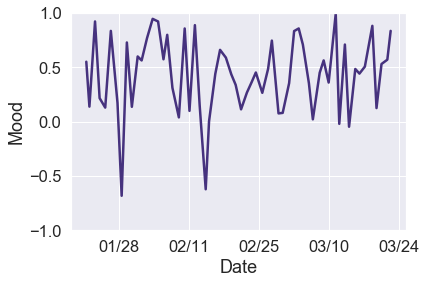

In [359]:
ax=sns.lineplot(data=df,x='Date',y='Mood')
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
ax.set_ylim([-1,1])
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.show()


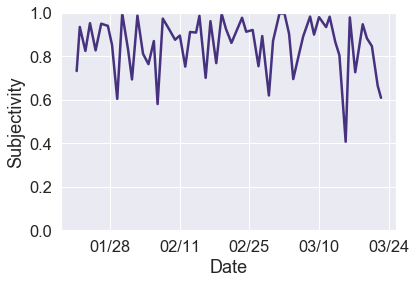

In [360]:
ax=sns.lineplot(data=df,x='Date',y='Subjectivity')
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
ax.set_ylim([0,1])
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.show()

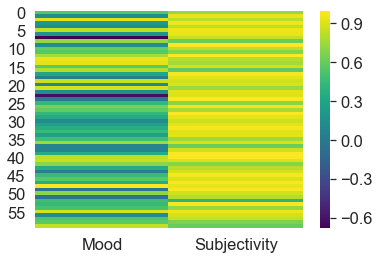

In [361]:
df_heatmap = df.drop(["Topic", "Date"],axis=1)
ax2=sns.heatmap(data=df_heatmap,cmap='viridis')

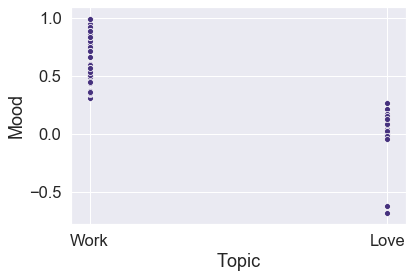

In [362]:
ax=sns.scatterplot(data=df, x='Topic', y='Mood')

In [363]:
print("It seems like you talk about work in a positive light, while you talk about love negatively")

It seems like you talk about work in a positive light, while you talk about love negatively
